In [2]:
from scipy.ndimage import correlate
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from skimage.util import img_as_int
from skimage.filters import threshold_otsu
from skimage.filters import median
from skimage.filters import gaussian
import pandas as pd
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import disk 
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform
import seaborn as sns
from scipy.stats import norm
from scipy.spatial import distance
from skimage import measure
import pydicom as dicom

In [3]:
def load_show(img):
    im = io.imread(img)
    io.imshow(im)
    io.show()
    return im

In [4]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray", vmin=-200, vmax=500)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

In [5]:
in_dir = "data/"
ct = dicom.read_file(in_dir + 'Training.dcm')
img = ct.pixel_array
print(img.shape)
print(img.dtype)

(512, 512)
int16


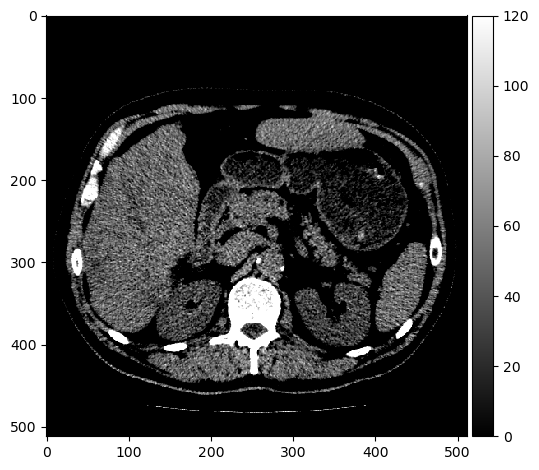

In [12]:
io.imshow(img, vmin=0, vmax=120, cmap='gray')
io.show()

/opt/conda/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


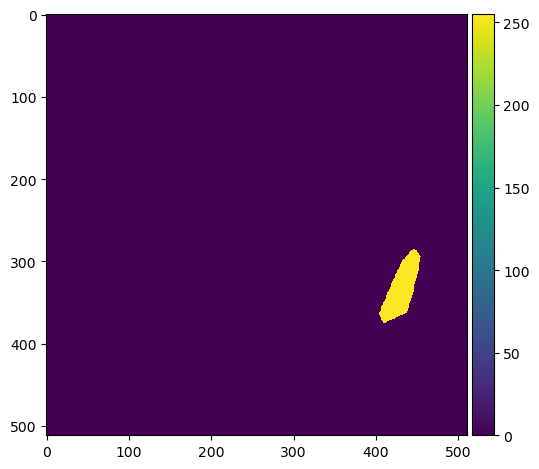

In [18]:
spleen_roi = io.imread(in_dir + 'SpleenROI.png')
io.imshow(spleen_roi)
io.show()
# convert to boolean image
spleen_mask = spleen_roi > 0
spleen_values = img[spleen_mask]

In [17]:
spleen_values[1]

54